In [96]:
import numpy as np
import os
from scipy.misc import imresize, imread
# imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. 
# Use imageio.imread instead.
import imageio
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
print ("PACKAGES LOADED") 
print ("CURRENT FOLDER IS [%s]" % (cwd) )

PACKAGES LOADED
CURRENT FOLDER IS [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers]


In [97]:
(cwd)

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers'

In [98]:
print ("CURRENT FOLDER IS [%s]" % (cwd) )

CURRENT FOLDER IS [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers]


In [119]:
# Configuration

# FOLDER LOCATIONS
#paths = ["../../img_dataset/celebs/Arnold_Schwarzenegger"
#        , "../../img_dataset/celebs/Junichiro_Koizumi"
#        , "../../img_dataset/celebs/Vladimir_Putin"
#        , "../../img_dataset/celebs/George_W_Bush"
#        , "../../img_dataset/celebs/Tony_Blair"]

# 각 폴더들의 상대경로를 지정
paths  = ["/img/ila"
        , "/img/sarang"]

# 각 폴더들의 이름
#categories = ['Terminator', 'Koizumi', 'Putin', 'Bush', 'Blair']
categories = ['ila', 'sarang']
# CONFIGURATIONS
imgsize   = [64, 64]
# 0으로 하면 칼라, 1로하면 Grayscale이다.
use_gray  = 0
data_name = "custom_data"

print ("YOUR IMAGES SHOULD BE AT")
for i, path in enumerate(paths):
    print (" [%d/%d] %s" % (i, len(paths), path)) 
print ("DATA WILL BE SAVED TO \n [%s]" 
       % (cwd + '/data/' + data_name + '.npz'))

YOUR IMAGES SHOULD BE AT
 [0/2] /img/ila
 [1/2] /img/sarang
DATA WILL BE SAVED TO 
 [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers/data/custom_data.npz]


In [120]:
cwd

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers'

In [121]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        return rgb

In [122]:
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    #path = cwd + "/" + relpath
    path = cwd + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imageio.imread(fullpath)
        # CONVERT TO GRAY (IF REQUIRED)
        if use_gray:
            grayimg  = rgb2gray(currimg)
        else:
            grayimg  = currimg
        # RESIZE
        # 이미지의 크기를 정해놓은 사이즈로 일괄 수정
        # imresize를 쓰면 크기가 맞지 않는다는 오류가 발생
        # resize는 OpenCV사용
        #graysmall = cv.resize(grayimg, (imgsize[0],imgsize[1]), interpolation=cv.INTER_AREA)        
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        
        # 이미지를 한줄로 펴줌
        grayvec   = np.reshape(graysmall, (1, -1))
        # SAVE 
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = grayvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt    = imgcnt + 1
print ("TOTAL %d IMAGES" % (imgcnt))

TOTAL 16 IMAGES


In [123]:
grayvec.shape

(1, 12288)

In [124]:
totalimg.shape

(16, 12288)

In [125]:
curr_label.shape

(1, 2)

In [126]:
totallabel.shape

(16, 2)

In [127]:
imgcnt

16

In [128]:
graysmall.shape

(64, 64, 3)

In [129]:
currimg.shape

(225, 225, 3)

In [130]:
grayimg.shape

(225, 225, 3)

In [131]:
fullpath

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers/img/sarang\\images3434.jpg'

In [132]:
relpath

'/img/sarang'

In [133]:
cwd + relpath

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers/img/sarang'

In [134]:
cwd

'C:\\JupyterWORK\\00_Jupyter notebook\\01_Project\\180130_KOOC_PhD Choi_DL starting with the latest papers'

In [135]:
def print_shape(string, x):
    print ("SHAPE OF [%s] IS [%s]" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("totalimg", totalimg)
print_shape("totallabel", totallabel)
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

SHAPE OF [totalimg] IS [(16, 12288)]
SHAPE OF [totallabel] IS [(16, 2)]
SHAPE OF [trainimg] IS [(12, 12288)]
SHAPE OF [trainlabel] IS [(12, 2)]
SHAPE OF [testimg] IS [(4, 12288)]
SHAPE OF [testlabel] IS [(4, 2)]


In [136]:
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel
         , imgsize=imgsize, use_gray=use_gray, categories=categories)
print ("SAVED TO [%s]" % (savepath))

SAVED TO [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers/data/custom_data.npz]


In [137]:
# LOAD
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath)
print (l.files)

# Parse data
trainimg_loaded   = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded    = l['testimg']
testlabel_loaded  = l['testlabel']
categories_loaded = l['categories']

print ("[%d] TRAINING IMAGES" % (trainimg_loaded.shape[0]))
print ("[%d] TEST IMAGES" % (testimg_loaded.shape[0]))
print ("LOADED FROM [%s]" % (savepath))

['trainimg', 'imgsize', 'testimg', 'trainlabel', 'use_gray', 'testlabel', 'categories']
[12] TRAINING IMAGES
[4] TEST IMAGES
LOADED FROM [C:\JupyterWORK\00_Jupyter notebook\01_Project\180130_KOOC_PhD Choi_DL starting with the latest papers/data/custom_data.npz]


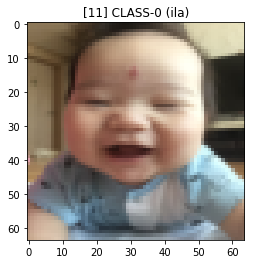

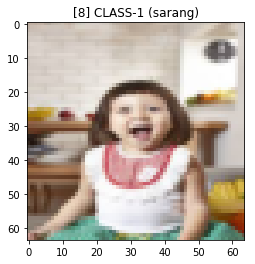

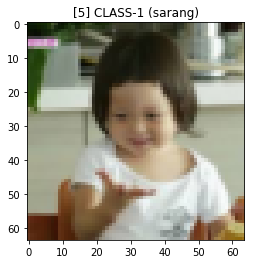

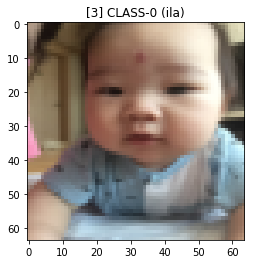

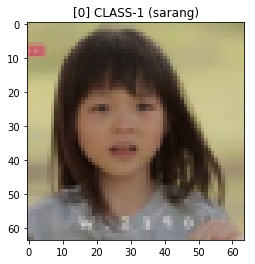

In [139]:
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = ("[%d] CLASS-%d (%s)" 
                    % (i, currlabel, categories_loaded[currlabel]))
    plt.title(title_string) 
    plt.show()